In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import CPA

plt.style.use('dark_background')

In [ ]:
class PCA_cust():

    def __init__(self, n_components):
        self.n_components = n_components
        self.eigvalues = None
        self.eigvectors = None
        self.var_exp = None
        self.pca_scores = None


    def fit(self, x):
        # mean centering
        mean_vector = np.mean(x, axis = 0)
        mean_vector = np.array(mean_vector).reshape(1, -1)

        mean_matrix = np.tile(mean_vector, (x.shape[0], 1))
        x_centered = x - mean_matrix

        # variance
        var_vector = np.var(x, axis = 0, ddof = 1)
        var_vector = np.array(var_vector).reshape(1, -1)
        var_matrix = np.tile(var_vector, (x.shape[0], 1))
        x_scaled_centered = x_centered / var_matrix

        cov_matrix = np.cov(x_scaled_centered, rowvar = False) # Vectors projects

        #eigen values and vectors - vectors among which the projects variation is higher and values-magnitutde which define vector importance

        eigenvalues, eigenvectors = LA.eig(cov_matrix)

        #sort eigenvalues and eigenvectors
        sort_idx = eigenvalues.argsort()[::-1]
        self.eigvalues = eigenvalues[sort_idx]
        self.eigvectors = eigenvectors[:, sort_idx]

        # Variance explained calculation
        self.var_exp = []
        var_tot = np.sum(self.eigvectors)

        for i in range(self.eigvectors.shape[1]):
            var_i = np.sum(self.eigvectors[:, i])
            self.var_exp.append((var_i / var_tot) * 100)

        # Calculation of final projection of each observation to each vector
        pca_scores = x_scaled_centered.dot(self.eigvectors)
        pca_scores = np.array(pca_scores)

        self.pca_scores = pca_scores[:, :self.n_components]



        return self.pca_scores, self.var_exp




In [ ]:
df = pd.read_csv('CC GENERAL.csv')

In [ ]:
df.drop('CUST_ID', axis = 1, inplace = True)
df.dropna(inplace = True)

In [ ]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [ ]:
pca_model = PCA(n_components = 5)
df_pca = pca_model.fit_transform(df_sc)

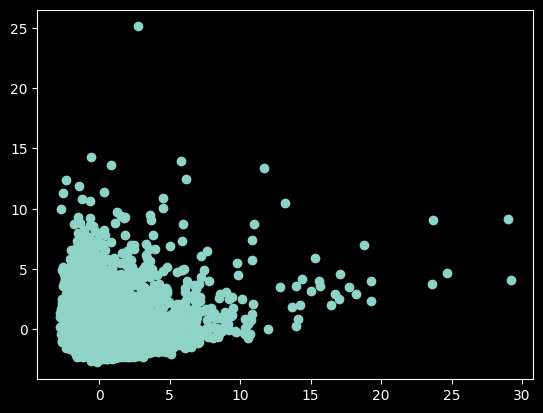

In [ ]:
plt.figsize = (10, 10)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.show()

In [ ]:
pca_cust = PCA_cust(n_components = 5)
df_pca_cust, var_exp = pca_cust.fit(df_sc)

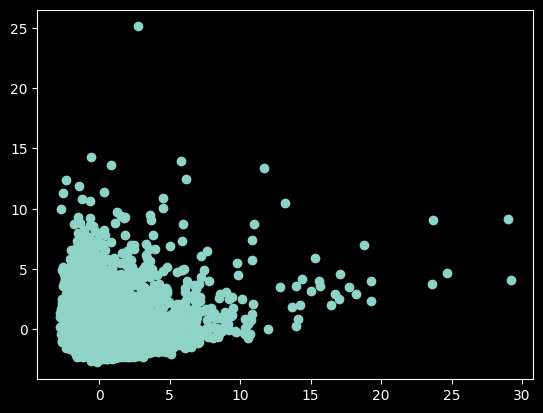

In [ ]:
plt.figsize = (10, 10)
plt.scatter(df_pca_cust[:, 0], df_pca_cust[:, 1])
plt.show()